In [1]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 74.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install os

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


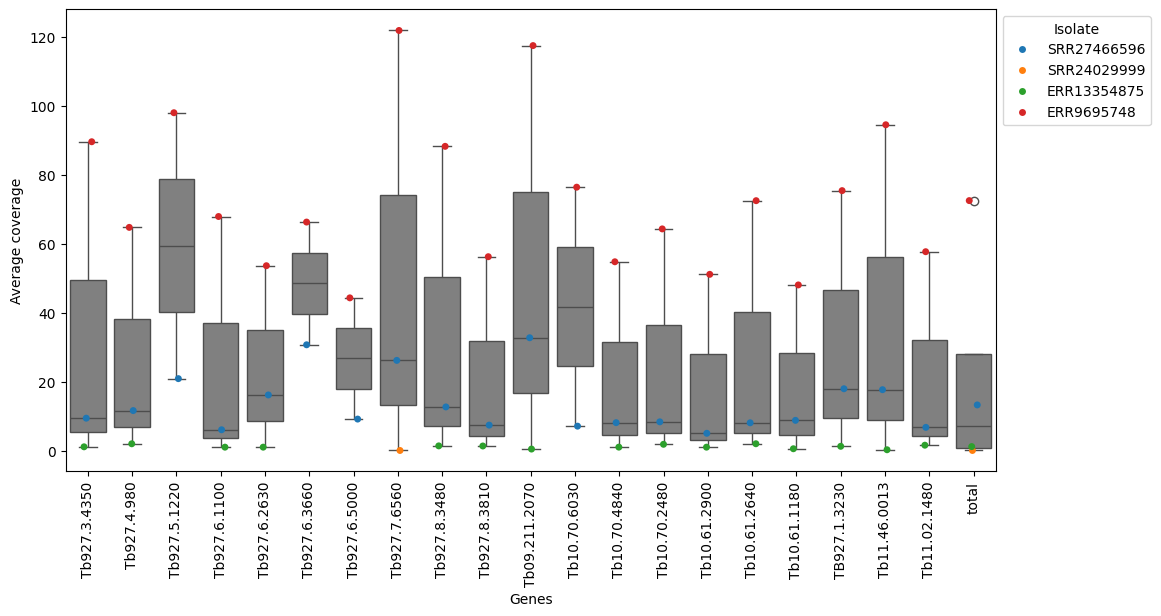

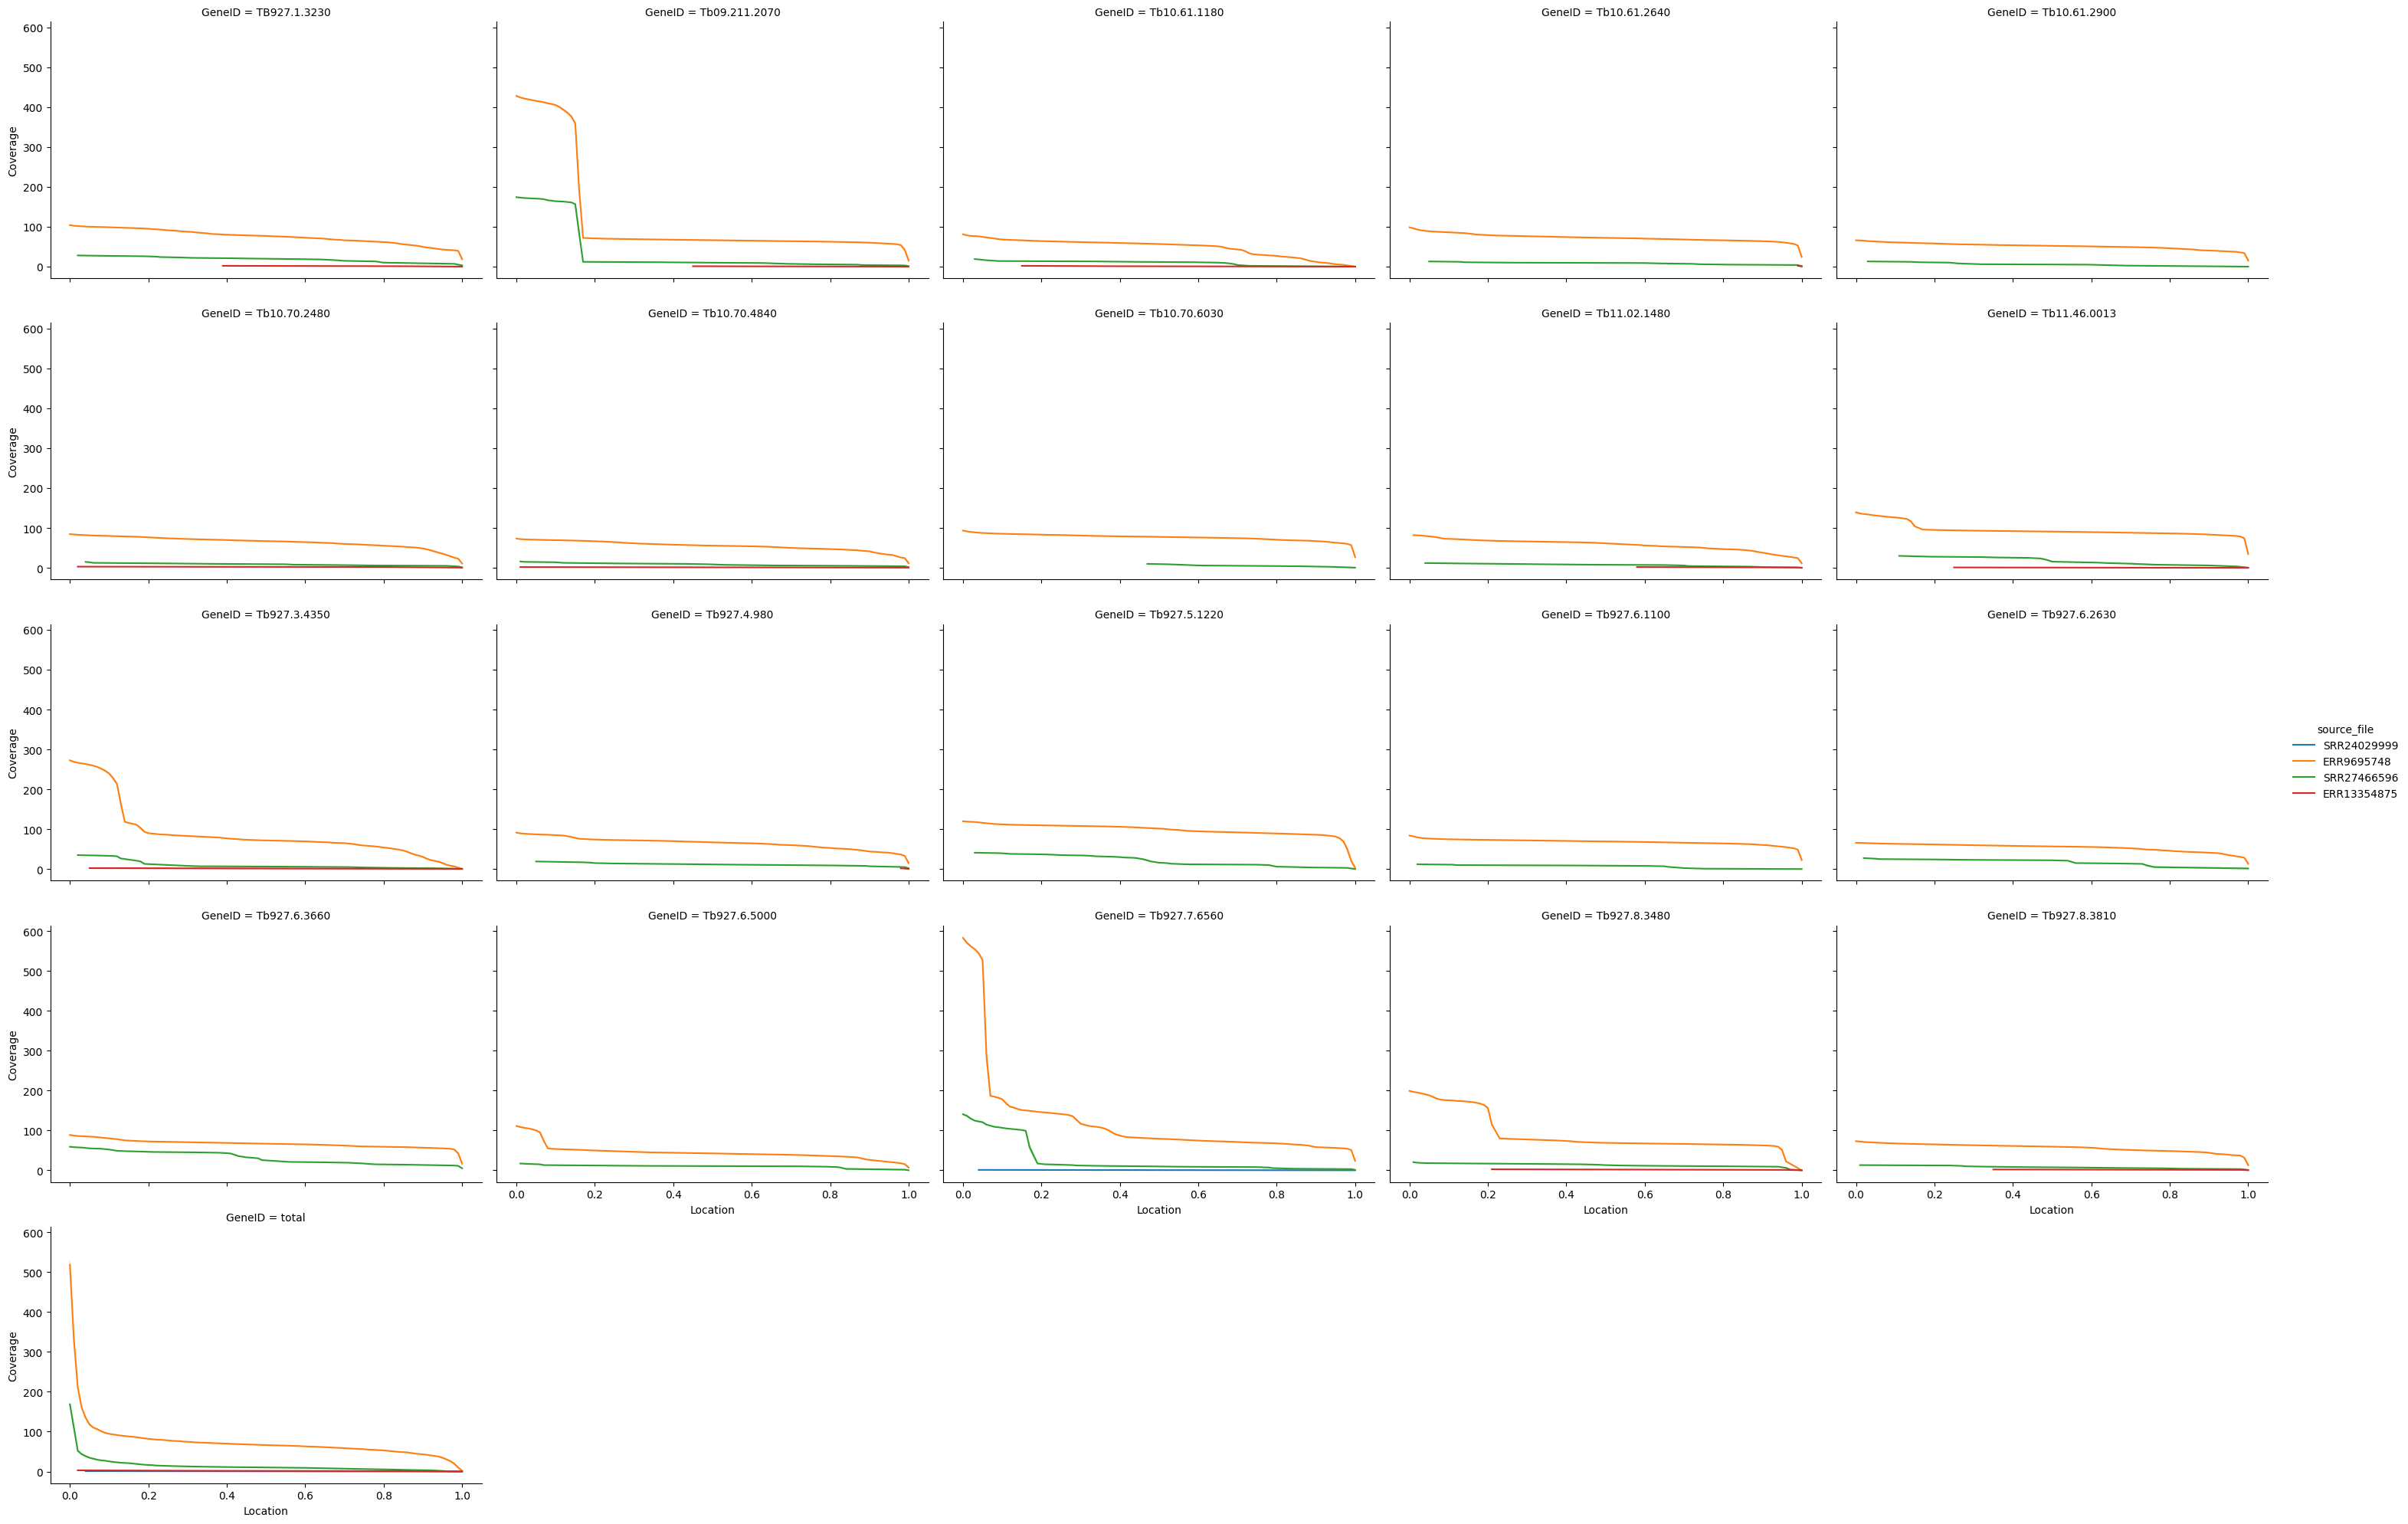

In [1]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
import csv

# Define the directory containing the CSV files
csv_dir = '../Mosdepth/'
output_file = 'combined_data.csv'
 
# List to hold individual DataFrames
dataframes = []
 
# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.summary.txt'):
        file_path = os.path.join(csv_dir, csv_file)
       
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
       
        # Add a new column with the file name (without extension)
        df['source_file'] = os.path.splitext(csv_file)[0].split('.')[0]
       
        # Append the DataFrame to the list
        dataframes.append(df)
 
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=0)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False, sep='\t', quoting=csv.QUOTE_NONE, escapechar=' ')

#print(f"Combined data saved to {output_file}")
#print(combined_df)
#sns.boxplot(x='chrom', y='mean', data=combined_df)

data_1 = pd.read_csv('combined_data.csv', sep='\t', usecols=['chrom', 'mean', 'source_file'])
plt.figure(figsize=(12,6))
sns.boxplot(x='chrom', y='mean', data=data_1, color='gray')
sns.stripplot(x='chrom', y='mean', data=data_1, hue='source_file', size=5, jitter=True, )
plt.xticks(rotation=90)
plt.xlabel('Genes')
plt.ylabel('Average coverage')
plt.legend(title="Isolate", bbox_to_anchor=(1, 1))
plt.show()

csv_dir = '../Mosdepth/'
output2_file = 'combined_raw.csv'
dataframes = []

for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.mosdepth.global.dist.txt'):
        file_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(file_path, names=['GeneID', 'Coverage', 'Location'], sep='\t')
        df['source_file'] = os.path.splitext(csv_file)[0].split('.')[0]
        dataframes.append(df)

combined_df = pd.concat(dataframes, axis=0)
combined_df.to_csv(output2_file, index=False, sep='\t', quoting=csv.QUOTE_NONE, escapechar=' ')

plot_data = pd.read_csv('combined_raw.csv', sep='\t', usecols=['GeneID', 'Coverage', 'Location', 'source_file'])

plot_data['GeneID'] = pd.Categorical(plot_data['GeneID'], ordered=True)
num_genes = plot_data['GeneID'].nunique()
num_cols = 5
num_rows = -(-num_genes // num_cols)

g = sns.FacetGrid(plot_data, col='GeneID', hue='source_file', height=4, aspect=1.5, col_wrap=num_cols)
g.map_dataframe(sns.lineplot, x='Location', y='Coverage')
g.add_legend()

plt.show()

